# Objetivo do projeto: projeto de previsão de aderência de clientes a um investimento em uma campanha de marketing de um banco

In [ ]:
import pandas as pd
dados = pd.read_csv('/content/drive/MyDrive/marketing_investimento.csv')

In [ ]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


# Checando qualidade dos dados - se possui dados nulos

In [ ]:
dados.info() # sem dados nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


In [ ]:
dados.describe()

,idade,saldo,tempo_ult_contato,numero_contatos
count,1268.000000,1268.000000,1268.000000,1268.000000
mean,41.376972,1443.426656,367.574921,2.715300
std,11.383805,2690.406767,347.969723,2.885642
min,19.000000,-1206.000000,5.000000,1.000000
25%,33.000000,91.250000,134.000000,1.000000
50%,39.000000,491.500000,251.000000,2.000000
75%,49.000000,1623.500000,488.250000,3.000000
max,87.000000,27069.000000,3025.000000,32.000000


# Analise Exploratoria os dados

## Variaveis categoricas

In [ ]:
import plotly.express as px
px.histogram(dados, x = 'aderencia_investimento', text_auto = True)

In [ ]:
px.histogram(dados, x = 'estado_civil', text_auto = True, color = 'aderencia_investimento',  barmode = 'group')

In [ ]:
px.histogram(dados, x = 'escolaridade', text_auto = True, color = 'aderencia_investimento',  barmode = 'group')


In [ ]:
px.histogram(dados, x = 'inadimplencia', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [ ]:
px.histogram(dados, x = 'fez_emprestimo', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

## Variaveis numericas

In [ ]:
px.box(dados, x = 'idade', color = 'aderencia_investimento')

In [ ]:
px.box(dados, x = 'saldo', color = 'aderencia_investimento')

In [ ]:
px.box(dados, x = 'tempo_ult_contato', color = 'aderencia_investimento')

In [ ]:
px.box(dados, x = 'numero_contatos', color = 'aderencia_investimento')


## Variaveis explicativas e variavel alvo - variaveis explicativas sao usadas pra o comportamento da variavel alvo

## Transformando variaveis explicativas

In [ ]:
x = dados.drop('aderencia_investimento', axis = 1)
y = dados['aderencia_investimento']

In [ ]:
x

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4
...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6
1264,35,solteiro (a),superior,nao,5958,nao,215,1
1265,30,solteiro (a),superior,nao,-477,sim,1532,2
1266,42,casado (a),superior,nao,2187,nao,525,3


In [ ]:
y

0       sim
1       sim
2       nao
3       sim
4       sim
       ... 
1263    sim
1264    sim
1265    sim
1266    sim
1267    sim
Name: aderencia_investimento, Length: 1268, dtype: object

## One Hot enconding

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
colunas = x.columns

In [ ]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [ ]:
x = one_hot.fit_transform(x)

In [ ]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [ ]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transformando variavel alvo

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)

# Exercicios

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/churn.csv')
data = data.drop('id_cliente', axis=1)
data

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Homem,39,5,0.00,2,1,0,96270.64,0
9996,516,França,Homem,35,10,57369.61,1,1,1,101699.77,0
9997,709,França,Mulher,36,7,0.00,1,0,1,42085.58,1
9998,772,Alemanha,Homem,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
x_exec = data.drop('churn', axis=1)
y_exec = data['churn']

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
colunas_exec = x_exec.columns
one_hot_exec = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['pais', 'sexo_biologico', 'tem_cartao_credito', 'membro_ativo']
),
    remainder = 'passthrough',
    sparse_threshold=0)
x_exec = one_hot_exec.fit_transform(x_exec)
one_hot_exec.get_feature_names_out(colunas_exec)

array(['onehotencoder__pais_Alemanha', 'onehotencoder__pais_Espanha',
       'onehotencoder__pais_França',
       'onehotencoder__sexo_biologico_Mulher',
       'onehotencoder__tem_cartao_credito_1',
       'onehotencoder__membro_ativo_1', 'remainder__score_credito',
       'remainder__idade', 'remainder__anos_de_cliente',
       'remainder__saldo', 'remainder__servicos_adquiridos',
       'remainder__salario_estimado'], dtype=object)

In [ ]:
pd.DataFrame(x, columns = one_hot_exec.get_feature_names_out(colunas_exec)).head()

,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__sexo_biologico_Mulher,onehotencoder__tem_cartao_credito_1,onehotencoder__membro_ativo_1,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__servicos_adquiridos,remainder__salario_estimado
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_exec = label_encoder.fit_transform(y_exec)
y_exec

array([1, 0, 1, ..., 1, 1, 0])

# Ajustando modelos

## Divisão treino/Teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#stratify mostra que a divisao sera com base na variavel alvo(y) e o random_state pra padronizar com a aula
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y,  random_state = 5)

# Modelo Base - dummy classifier

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

0.6025236593059937

# Arvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore = DecisionTreeClassifier(random_state =5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [ ]:
arvore.predict(x_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
arvore.score(x_teste, y_teste)

0.6656151419558359

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']

### analisando arvore inicial

In [ ]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 1, feature_names = nome_colunas);


In [ ]:
# o modelo nao esta aprendendo, apenas decorando os dados da dataBase de teste
arvore.score(x_treino, y_treino)

1.0

## corrigindo modelo da arvore inicial

In [ ]:
#limitando as decisões da arvore, para fazer o modelo aprender as melhores decisões
arvore = DecisionTreeClassifier(max_depth = 3, random_state =5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [ ]:
arvore.score(x_treino, y_treino)

0.7613038906414301

In [ ]:
arvore.score(x_teste, y_teste)

0.7160883280757098

### Visualizando nova arvore melhorada

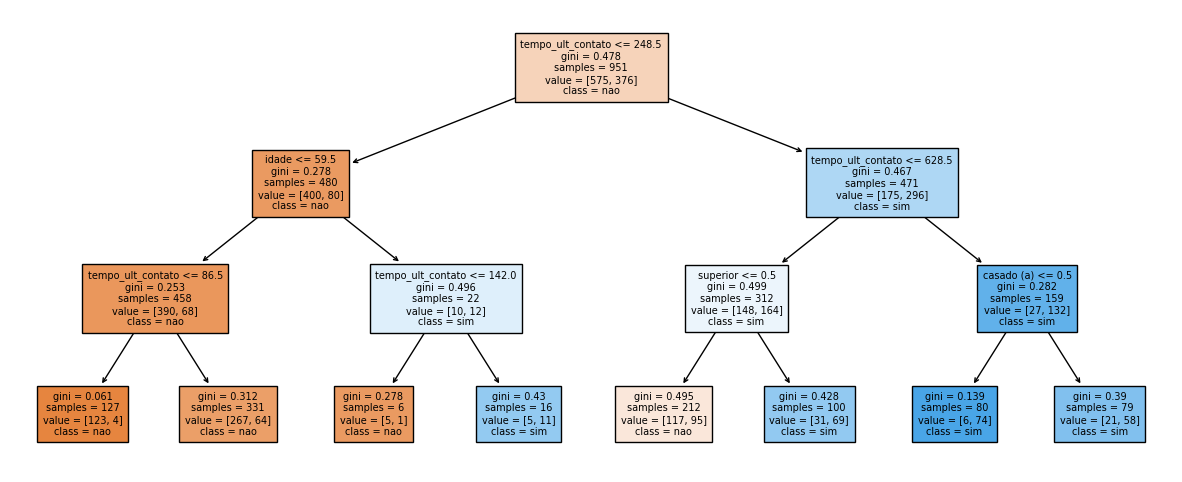

In [ ]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 7, feature_names = nome_colunas);

# exercicios

In [ ]:
x_treino1, x_teste1, y_treino1, y_teste1 = train_test_split(x_exec, y_exec, stratify = y_exec,  random_state = 5)

### Dummy

In [ ]:
dummy_exec = DummyClassifier()
dummy_exec.fit(x_treino1, y_treino1)

dummy_exec.score(x_teste1, y_teste1)

0.7964

In [ ]:
arvore_exec = DecisionTreeClassifier(max_depth = 4, random_state =5)
arvore_exec.fit(x_treino1, y_treino1)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [ ]:
arvore_exec.predict(x_teste1)

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
arvore_exec.score(x_teste1, y_teste1)

0.8464

In [ ]:
#plt.figure(figsize = (15, 6))
#plot_tree(arvore_exec, filled = True, class_names = ['nao', 'sim'], fontsize = 5);

# KNN

## Normalizando dados(tem dados com valores menores que 100 e outros na faixa de milhares, afetando o modelo)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [ ]:
pd.DataFrame(x_treino_normalizado)

## Aplicando o knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [ ]:
x_teste_normalizado = normalizacao.transform(x_teste)

In [ ]:
knn.score(x_teste_normalizado, y_teste) # pior que a arvore?

0.6876971608832808

# Selecionando o melhor modelo

In [ ]:
print(f'Acurácia Dummy: {dummy.score(x_teste, y_teste)}')
print(f'Acurácia Árvore: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado, y_teste)}')

Acurácia Dummy: 0.6025236593059937
Acurácia Árvore: 0.7160883280757098
Acurácia KNN: 0.6876971608832808


# Exportando modelo

In [ ]:
import pickle

In [ ]:
with open('modelo_onehotenc.pkl', 'wb') as arquivo:
  pickle.dump(one_hot, arquivo)

In [ ]:
with open('modelo_arvore.pkl', 'wb') as arquivo:
  pickle.dump(arvore, arquivo)

# Testando modelo com novos dados

In [ ]:
novo_dado = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}


In [ ]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado


,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,23040,nao,800,4


In [ ]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_arvore = pd.read_pickle('/content/modelo_arvore.pkl')

In [ ]:
novo_dado = modelo_one_hot.transform(novo_dado)
modelo_arvore.predict(novo_dado)
#o modelo agora preve que esse cliente exemplo irá aderir ao investimento

array([1])

In [ ]:
previsao = modelo_arvore.predict(novo_dado)

if previsao == 1:
  print("O cliente provavelmente irá aderir ao investimento.")
else:
  print("O cliente provavelmente não irá aderir ao investimento.")

O cliente provavelmente irá aderir ao investimento.


# Exercicios finais

In [ ]:
normalizacao_exec = MinMaxScaler()
x_treino_normalizado1 = normalizacao_exec.fit_transform(x_treino1)
pd.DataFrame(x_treino_normalizado1)

In [ ]:
knn_exec = KNeighborsClassifier()
knn_exec.fit(x_treino_normalizado1, y_treino1)

KNeighborsClassifier()

In [ ]:
x_teste_normalizado1 = normalizacao_exec.transform(x_teste1)
knn_exec.score(x_teste_normalizado1, y_teste1)

0.8172

In [ ]:
print(f'Acurácia Dummy: {dummy_exec.score(x_teste1, y_teste1)}')
print(f'Acurácia Árvore: {arvore_exec.score(x_teste1, y_teste1)}')
print(f'Acurácia KNN: {knn_exec.score(x_teste_normalizado1, y_teste1)}')

Acurácia Dummy: 0.7964
Acurácia Árvore: 0.8464
Acurácia KNN: 0.8172
